In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
num_classes = 10
input_shape = (28, 28, 1)

# priprema podataka
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
def plot_predictions(x_data, predictions, num_samples=8):
    """
    Prikaz vise slika sa predikcijama
         
    Args:
        x_data (numpy.array): podaci
        predictions (numpy.array): predikcije
        num_samples (int): broj slika za prikazivanje
    """

    # generisanje indeksa 
    indices = np.random.randint(0, len(x_data), size=num_samples)
    
    # kreiranje plot-a
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    for i, id in enumerate(indices):
        image = x_data[id].reshape(28, 28) # reshape u 2D
        prediction = np.argmax(predictions[id]) # pronalazenje indeksa najveceg elementa
        
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"predikcija: {prediction}")
    
    plt.show()

In [17]:
# kreiranje modela
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [19]:
batch_size = 128
epochs = 15

# kompilacija i treniranje modela
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.01)

Epoch 1/15
465/465 [==============================] - 15s 32ms/step - loss: 0.0899 - accuracy: 0.1507 - val_loss: 0.0898 - val_accuracy: 0.1650
Epoch 2/15
465/465 [==============================] - 14s 31ms/step - loss: 0.0896 - accuracy: 0.2021 - val_loss: 0.0895 - val_accuracy: 0.2167
Epoch 3/15
465/465 [==============================] - 14s 30ms/step - loss: 0.0894 - accuracy: 0.2442 - val_loss: 0.0893 - val_accuracy: 0.2383
Epoch 4/15
465/465 [==============================] - 14s 31ms/step - loss: 0.0891 - accuracy: 0.2812 - val_loss: 0.0890 - val_accuracy: 0.2683
Epoch 5/15
465/465 [==============================] - 14s 29ms/step - loss: 0.0888 - accuracy: 0.3147 - val_loss: 0.0887 - val_accuracy: 0.2967
Epoch 6/15
465/465 [==============================] - 13s 29ms/step - loss: 0.0885 - accuracy: 0.3438 - val_loss: 0.0883 - val_accuracy: 0.3183
Epoch 7/15
465/465 [==============================] - 16s 34ms/step - loss: 0.0880 - accuracy: 0.3678 - val_loss: 0.0878 - val_accuracy:

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.5513


[0.07001891732215881, 0.5512999892234802]

In [21]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [22]:
print(classification_report(y_test, keras.utils.to_categorical(np.argmax(y_predicted, axis=1))))

              precision    recall  f1-score   support

           0       0.43      0.98      0.60       980
           1       0.48      0.99      0.65      1135
           2       0.72      0.67      0.69      1032
           3       0.86      0.35      0.49      1010
           4       0.56      0.80      0.66       982
           5       1.00      0.00      0.00       892
           6       0.67      0.64      0.65       958
           7       0.56      0.83      0.67      1028
           8       0.00      0.00      0.00       974
           9       0.63      0.13      0.22      1009

   micro avg       0.55      0.55      0.55     10000
   macro avg       0.59      0.54      0.46     10000
weighted avg       0.59      0.55      0.47     10000
 samples avg       0.55      0.55      0.55     10000



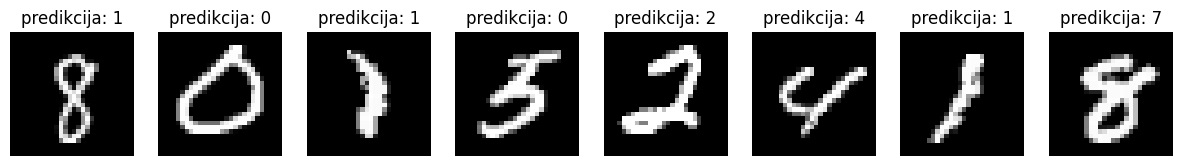

In [30]:
plot_predictions(x_test, y_predicted, num_samples=8)